In [1]:
import experiment_kfolds
%load_ext autoreload
%autoreload 2

In [5]:
default_exp = experiment_kfolds.Experiment(name="pnipam", linear=True)

dataset size:  (342, 15)
min label:  3.3783979009481375
max label:  4.646599751720373


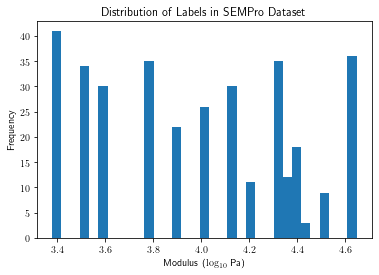

Using re-weighting: [SQRT_INV]
FOLD 0
--------------------------------
Loading pnipam_kf5_linear_fold_0
dataset size:  (342, 15)
min label:  3.3783979009481375
max label:  4.646599751720373


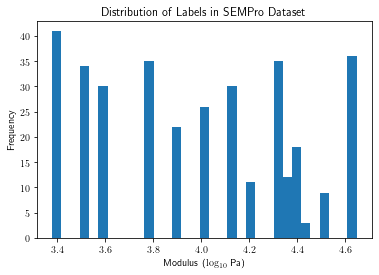

Using re-weighting: [SQRT_INV]
dataset size:  (342, 15)
min label:  3.3783979009481375
max label:  4.646599751720373


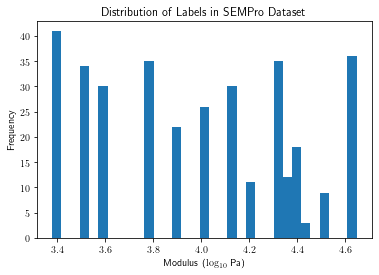

Using re-weighting: [SQRT_INV]
dataset size:  (342, 15)
min label:  3.3783979009481375
max label:  4.646599751720373


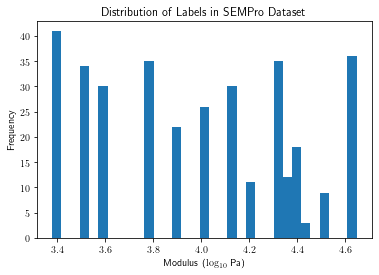

Using re-weighting: [SQRT_INV]
dataset size:  (342, 15)
min label:  3.3783979009481375
max label:  4.646599751720373


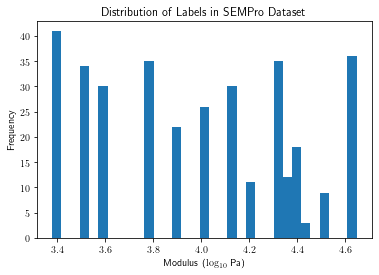

Using re-weighting: [SQRT_INV]
Model initialized w/ following trainable parameters:
model.fc.weight tensor([[-0.0048, -0.0033, -0.0032,  ..., -0.0198,  0.0115,  0.0083]],
       device='cuda:0')
model.fc.bias tensor([-0.0053], device='cuda:0')
Initialized experiment
Now running epoch 0 of fold 0


Validation data: 100%|██████████| 6/6 [00:01<00:00,  3.92it/s]


Training losses: MAE = 0.7267078981696141, MSE = 0.8687941236803371
Validation losses: MAE = 0.6681057322215718, MSE = 0.6557007177439775
Now running epoch 1 of fold 0


Training data:  32%|███▏      | 7/22 [00:02<00:05,  2.95it/s]

In [6]:
default_exp.kfolds()

In [ ]:
test_exp = experiment_kfolds.Experiment(name="pnipam")
pnipam_mae, pnipam_mse = test_exp.kfold_test_spec("pnipam_kf5_linear",5)
pretrained_mae, pretrained_mse = test_exp.kfold_test_spec("pre_kf5_linear",5)


In [ ]:
baseplate_mae, baseplate_mse = test_exp.kfold_test_spec("baseplate",5)
print(baseplate_mae)

[0.5639315583219513, 0.6838672378823477, 0.6951518827857253, 0.7716785420302887, 0.8652703348442976]
[0.4080416689539453, 0.4390135268568488, 0.42850170998158643, 0.5370311468836365, 0.4358794334383899]
0.7159799111729221
0.4496934972228814
0.11177399097780122
0.05029095797991769
Ttest_relResult(statistic=5.935751890949732, pvalue=0.002019328327605282)


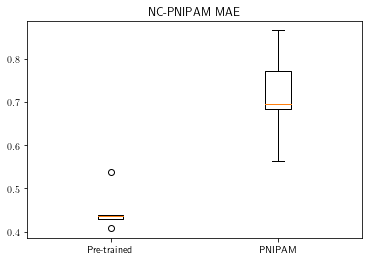

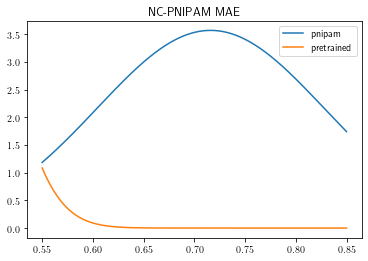

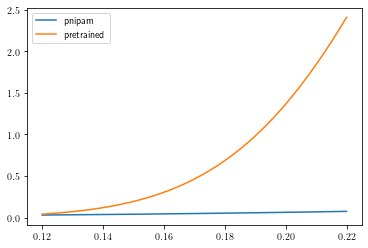

In [7]:
import scipy.stats as stats
import statistics
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.boxplot([pretrained_mae, pnipam_mae])
ax.set_xticklabels(['Pre-trained', 'PNIPAM'])
ax.set_title("NC-PNIPAM MAE")

x = np.arange(0.55,0.85,0.0001)

plt.figure()
plt.title("NC-PNIPAM MAE")
plt.plot(x,stats.norm.pdf(x,statistics.mean(pnipam_mae),statistics.stdev(pnipam_mae)), label="pnipam")

plt.plot(x,stats.norm.pdf(x,statistics.mean(pretrained_mae),statistics.stdev(pretrained_mae)), label="pretrained")

plt.legend()

plt.figure()
x = np.arange(0.12,0.22,0.0001)

plt.plot(x,stats.norm.pdf(x,statistics.mean(pnipam_mse),statistics.stdev(pnipam_mse)), label="pnipam")
plt.plot(x,stats.norm.pdf(x,statistics.mean(pretrained_mse),statistics.stdev(pretrained_mse)), label="pretrained")
plt.legend()

print(pnipam_mae)
print(pretrained_mae)
print(statistics.mean(pnipam_mae))
print(statistics.mean(pretrained_mae))

print(statistics.stdev(pnipam_mae))
print(statistics.stdev(pretrained_mae))

print(stats.ttest_rel(a=pnipam_mae, b=pretrained_mae, alternative="greater"))

# # print(pretrained_mae)
# print(statistics.mean(pnipam_mse))
# print(statistics.mean(pretrained_mse))

# print(statistics.stdev(pnipam_mse))
# print(statistics.stdev(pretrained_mse))

# print(stats.ttest_ind(a=pnipam_mse, b=pretrained_mse, equal_var=False))